#Assignment 1: Supervised Learning and kNN Algorithm

Group members:

1.   Hiep Huynh
2.   Duy Tran
3.   Dan Vu
4.   Dinh Nguyen

##Part 1: Familiarization and Basic Testing of the kNN Algorithm (6 pts)

Dataset Selection (2 pts):
Choose an interesting dataset (other than the Iris dataset) from Kaggle to apply kNN classification.

Algorithm Application (2 pts):
Run the kNN algorithm on the selected dataset. You may use either a custom kNN implementation or the sklearn version.

Use Case Identification (2 pts):
List two real-world applications of the kNN algorithm. These can be business-related or other domains where kNN is valuable.

##Part 2: In-Depth Experimentation with the kNN Algorithm (6.5 pts)

Parameter Experimentation (2 pts):
Experiment with various values of k to observe changes in model performance.

Train-Test Split Analysis (2 pts):
Evaluate the effect of different train/test splits (e.g., 80/20) on your model’s accuracy.

k-Fold Cross-Validation (2.5 pts):
Apply a k-fold approach to your data and analyze the results.

# 1. Data Preprocessing
The dataset used in this project is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The objective is to predict whether or not a patient is at risk of developing diabetes, based on certain diagnostic measurements included in the dataset.

First, let's import necessary libraries, load the data, and explore it to understand feature distributions and identify missing values.

###**1.1. Import libraries and Load the data**

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/hiephamk/Data_Group_Project/main/diabetes_prediction_dataset.csv')

In [3]:
# Display the first 10 rows of the data
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


###**1.2. Data exploration**

In [4]:
# Check data types and get overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


**Overview:**

* Dataset has 100000 samples and 9 columns.
* The columns include:
  - Gender
  - Age
  - Hypertension
  - Heart_disease
  - Smoking_history
  - BMI
  - HbA1c_level
  - Blood_glucose_level
  - Diabetes
* 'Diabetes' is the label column, with a value of 0 or 1 (classify people with or without diabetes).

There are 2 columns ('gender', 'smoking_history') with object type and in text format. Therefore we need to convert their values to number before applying kNN algorithm.

In [5]:
# Transform the 'gender' and 'smoking_history' values
labelEncoder = LabelEncoder()
df['gender'] = labelEncoder.fit_transform(df['gender'])
df['smoking_history'] = labelEncoder.fit_transform(df['smoking_history'])
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1
7,0,79.0,0,0,0,23.86,5.7,85,0
8,1,42.0,0,0,4,33.64,4.8,145,0
9,0,32.0,0,0,4,27.32,5.0,100,0


In [6]:
# View 'gender' unique values after labelled
df['gender'].value_counts().sort_index()

gender
0    58552
1    41430
2       18
Name: count, dtype: int64

In [7]:
# View 'smoking_history' unique values after labelled
df['smoking_history'].value_counts().sort_index()

smoking_history
0    35816
1     9286
2     4004
3     9352
4    35095
5     6447
Name: count, dtype: int64

In [8]:
# Check for missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
# Check n/a value
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [10]:
# View distribution of target variable 'Diabetes'
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

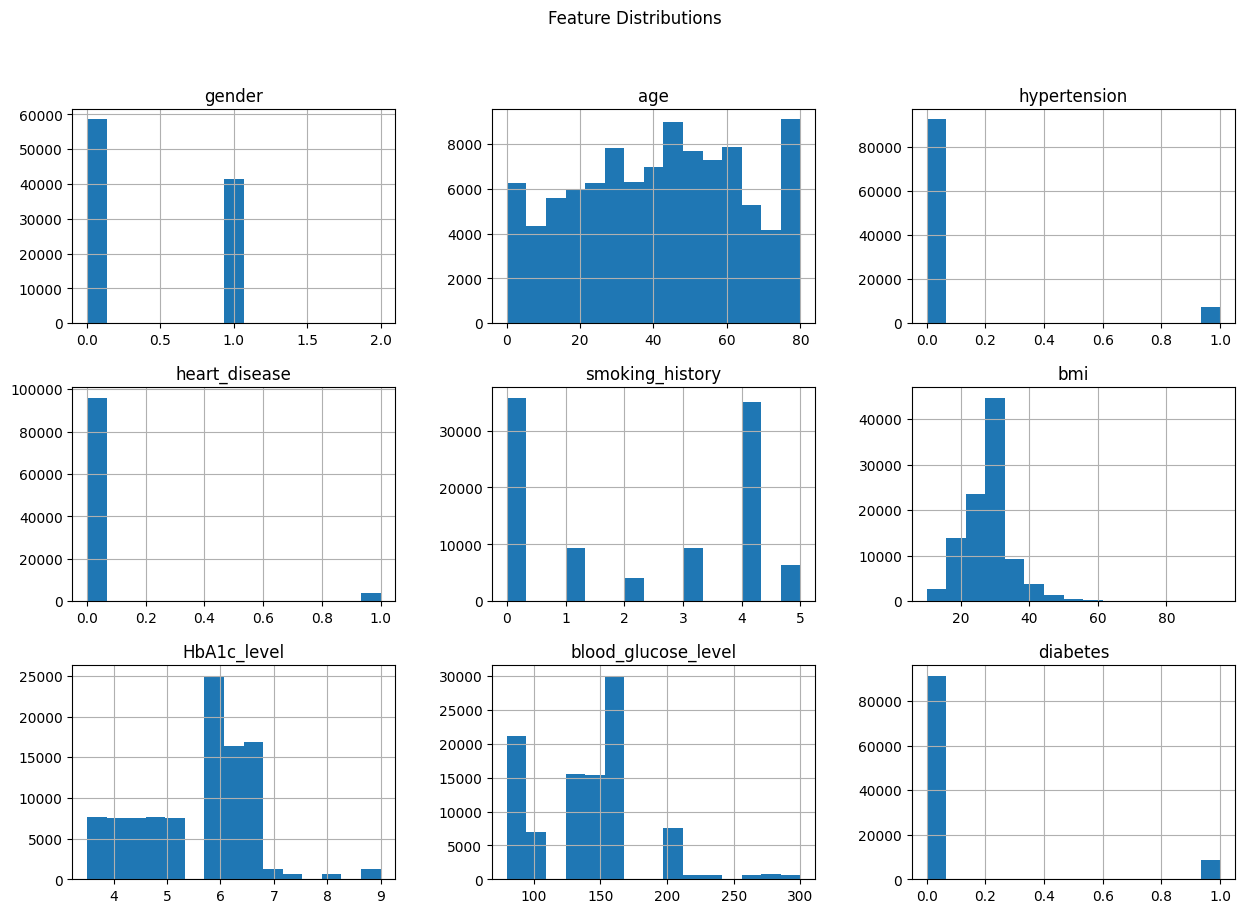

In [11]:
# Visualize the distribution of each feature
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

# 2. kNN Algorithm Application

We'll apply kNearestNeighbors algorithm on the dataset with an initial k value of 5.

First, we split the dataset into a training-testing set which reserves 80% of the data for training and 20% for testing. Then we evaluate its accuracy, classification report, and confusion matrix.

In [12]:
# Separate features and target variables
x = df.iloc[:, :-1]
y = df.iloc[:, -1:].squeeze()
x.head(10)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
5,0,20.0,0,0,4,27.32,6.6,85
6,0,44.0,0,0,4,19.31,6.5,200
7,0,79.0,0,0,0,23.86,5.7,85
8,1,42.0,0,0,4,33.64,4.8,145
9,0,32.0,0,0,4,27.32,5.0,100


In [13]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: diabetes, dtype: int64

In [14]:
# Split the dataset into training and test sets (80-20 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = True, random_state=0)

In [15]:
# Implement the kNN model with k=5 and generate predictions
k = 5
knn = KNeighborsClassifier(k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score of k=5, test size=0.2:", accuracy)

Accuracy score of k=5, test size=0.2: 0.95355


Classification Report
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18297
           1       0.87      0.54      0.66      1703

    accuracy                           0.95     20000
   macro avg       0.91      0.76      0.82     20000
weighted avg       0.95      0.95      0.95     20000



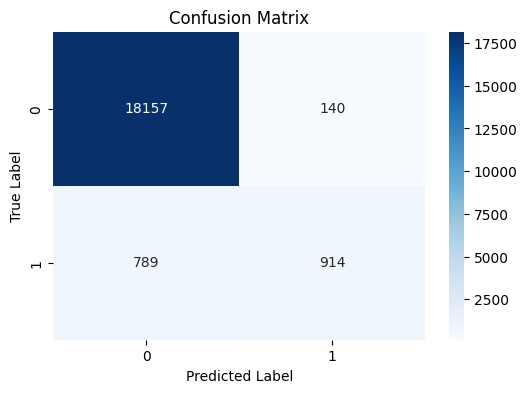

In [16]:
# View classification report
print("Classification Report\n", classification_report(y_test, y_pred))

# View confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

What we found:
*   The dataset is imbalanced, with more instances of class 0 than class 1, affecting the model's recall and causing false negatives.
*   Despite high precision for both classes, the model tends to miss positive cases due to the imbalance.
*   The F1-score difference confirms that the model performs better with the negative class.



# 3. Use Case Identification
kNN is widely used in many different industries, particularly for classification and regression tasks. Here are two real-world uses of kNN:

###**3.1. Medical diagnosis in Healthcare**

In the medical field, kNN is used to categorize patients according to test results, medical history, and symptoms. It identifies patients with similar medical profiles so that comparisons can be made to help in diagnosis.

For example, kNN assists in classifying patients into high-risk or low-risk categories based on patterns in their data and suggests individualized treatment strategies for disorders like diabetes or heart conditions.

###**3.2. Customer segmentation in Retail**
kNN is frequently used in the retail industry to categorize customers according to their browsing history, purchasing patterns, and preferences. Retailers can use it to identify valuable customers, loyal customers, or customers with specific interests.

For instance, kNN can suggest products to customers who have purchased specific items by classifying and contrasting clients with comparable buy histories or preferences.

# Parameter Experimentation
To find the best performing k, we'll run kNN with different k values **on the 80-20 training-testing set** and observe changes in model accuracy.

In [17]:
# Create a list of k values
k_values = [3, 5, 7, 9, 11]

# Implementing the KNN classifier, and evaluating the score
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    accuracies.append(score)
    print(f"K: {k}, Test size: 0.2, Accuracy: {round(score,4)}")

K: 3, Test size: 0.2, Accuracy: 0.9517
K: 5, Test size: 0.2, Accuracy: 0.9536
K: 7, Test size: 0.2, Accuracy: 0.9542
K: 9, Test size: 0.2, Accuracy: 0.954
K: 11, Test size: 0.2, Accuracy: 0.9539


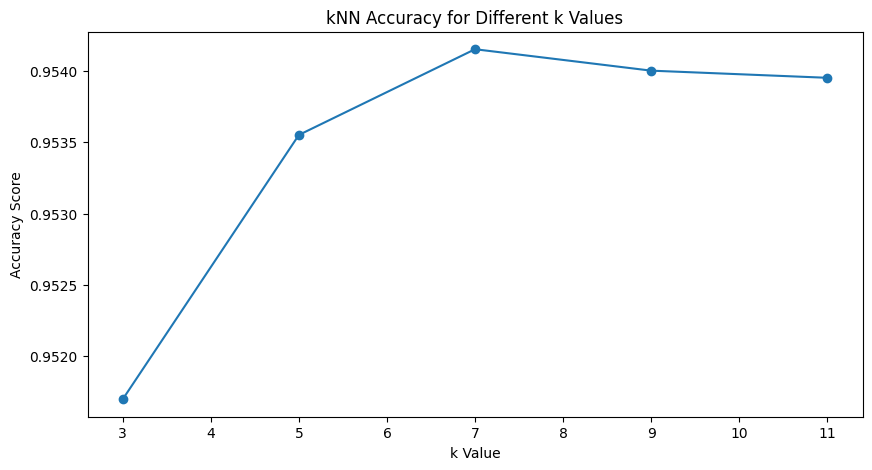

In [18]:
# Visualize accuracy scores vs. k values by line chart
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k Value')
plt.ylabel('Accuracy Score')
plt.title('kNN Accuracy for Different k Values')
plt.show()


We can see that the value **k = 7** achieves the highest accuracy at **0.9542**. So it is the best performing value for this dataset.

# Train-Test Split Analysis
As we found the best performing k value in the previous step, we’ll test different train-test split ratios with k = 7 and analyze their impact on model accuracy.

In [19]:
# Create different train-test splits & evaluate accuracy scores
train_split = [0.5, 0.6, 0.7, 0.8, 0.9]
split_accuracies = []

for split in train_split:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1-split, shuffle = True, random_state=0)
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    split_accuracies.append(score)
    print(f"Test size: {round(1-split, 1)}, K = 7, Accuracy: {round(score, 4)}")

Test size: 0.5, K = 7, Accuracy: 0.9512
Test size: 0.4, K = 7, Accuracy: 0.9525
Test size: 0.3, K = 7, Accuracy: 0.9539
Test size: 0.2, K = 7, Accuracy: 0.9542
Test size: 0.1, K = 7, Accuracy: 0.9548


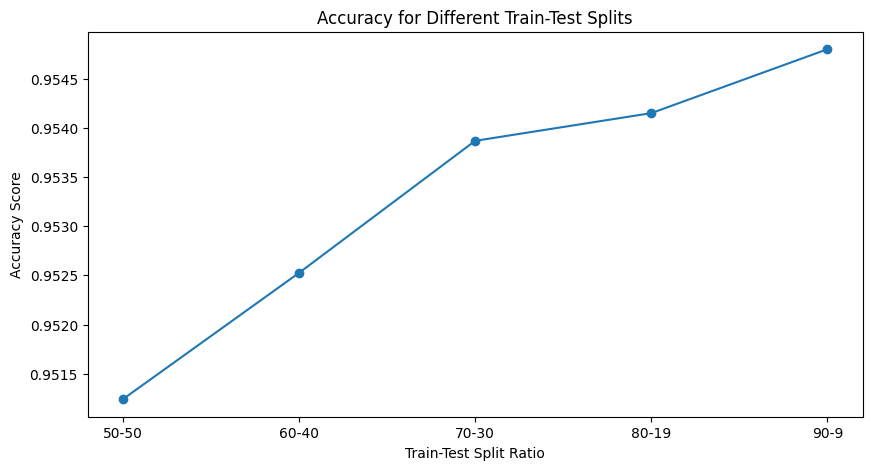

In [20]:
# Visualize train-test split ratio vs. accuracy by line chart
plt.figure(figsize=(10, 5))
plt.plot([f"{int(s*100)}-{int((1-s)*100)}" for s in train_split], split_accuracies, marker='o')
plt.xlabel('Train-Test Split Ratio')
plt.ylabel('Accuracy Score')
plt.title('Accuracy for Different Train-Test Splits')
plt.show()


We can observe that greater model performance results from utilizing a smaller test size and a bigger fraction of the data for training.

# k-Fold Cross-Validation
Finally, we’ll perform k-fold cross-validation to get a reliable estimate of model performance across different data splits.

*   We divide the dataset into 5 subsets, and train the model 5 times, each time using a different fold as the test set and the remaining 4 as the training set.
*   For each iteration, we train the model with n_neighbors=7, make predictions on the test fold, and calculate the accuracy.
*   We store these accuracies in a list, and finally compute the average accuracy across all folds.



In [21]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=0)
accuracies = []

x = df.drop('diabetes', axis=1)
y = df['diabetes']

for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print(f"Accuracies for each fold: {accuracies}")
print(f"Average Accuracy across all folds: {average_accuracy:.2f}")

Accuracies for each fold: [0.95415, 0.95245, 0.9529, 0.9529, 0.95475]
Average Accuracy across all folds: 0.95


Together, the accuracy of each fold and average accuracy show that the model has a high level of accuracy (around 95%) for diabetes prediction. So we can say that this model is reliable for this dataset and well-suited for this classification task.

Let's try predicting a sample data (index 1 in the dataset)!

In [22]:
#Try predicting a sample data which can get from the df (index 1)
new_sample = np.array([[0, 54.0,	0,	0,	0,	27.32,	6.6,	80]])
prediction = knn.predict(new_sample)

# Print the predicted result
print(f"Prediction of the new sample: {'High risk' if prediction == 1 else 'Low risk'}")


Prediction of the new sample: Low risk


We observe that this model is likely to maintain accuracy on new data as well.